<a href="https://colab.research.google.com/github/Void-Brain70/Machine_Learning/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv("/content/insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


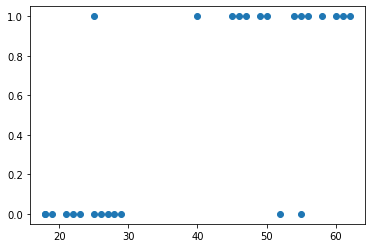

In [6]:
plt.scatter(df['age'],df['bought_insurance'])

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test,= train_test_split(df[['age']],df.bought_insurance,test_size=0.1)

In [8]:
len(x_train)

24

In [9]:
len(x_test)

3

In [10]:
x_test

,age
9,61
7,60
1,25


In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [12]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
x_test

,age
9,61
7,60
1,25


In [14]:
model.predict(x_test)

array([1, 1, 0])

In [15]:
model.predict([[8]])

array([0])

In [16]:
model.predict([[90]])

array([1])

In [17]:
model.predict([[30]])

array([0])

In [18]:
model.predict_proba(x_test)

array([[0.05563033, 0.94436967],
       [0.06270219, 0.93729781],
       [0.8515548 , 0.1484452 ]])

In [19]:
model.score(x_test,y_test)

1.0